In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# ICI C'EST LE SYSTEM QUI A ETE DONNE DANS L'EXERCICE
def f(x,u):
    dx = [0]*2
    
    dx[0] = u[0] * np.cos(u[1] * np.sin(x[1]))
    dx[1] = u[1] * np.sin(x[0] - x[1])
    
    return np.array(dx)

In [26]:
# ON DONNE LES PARAMETRES DE L'EXERCICE

# delta = 0.01 -> шаг интегрирования
# Время t от 0 до 10

# u1 et u2 nous choisissons entre -1 et 1 
# ICI J'AI CHOISI u1 = - 1/2  et  u2 = 1/2 donc u=[-1/2,1/2]


def Euler_corrected(x0,u=[-0.5,0.5],tmin=0,tmax=10,delta=0.01):
    res = []
    t=0
    xi = np.array(x0)
    f_xi = f(xi,u)
    
    res.append([xi[0],xi[1],f_xi[0],f_xi[1]])
    
    while t < tmax-delta:
        t += delta
        xi = xi + (f_xi + f(xi + f_xi*delta,u)) * delta * 0.5
        
        x1, x2 = xi
        f_xi = f(xi,u)
        dx1, dx2 = f_xi
        res.append([x1,x2,dx1,dx2])
    return np.array(res)

In [27]:
# Pour x0 = [1,2] et u = [-1/2, 1/2]
solution = Euler_corrected(x0=[1,2],u=[-0.5,0.5])

In [28]:
# LES CINQ PREMIERES LIGNES DE LA SOLUTION
solution[:5]

array([[ 1.        ,  2.        , -0.44920767, -0.42073549],
       [ 0.99550888,  1.99579226, -0.44901615, -0.42081203],
       [ 0.99101967,  1.99158376, -0.44882602, -0.42088781],
       [ 0.98653235,  1.9873745 , -0.44863731, -0.42096285],
       [ 0.98204692,  1.9831645 , -0.44845003, -0.42103715]])

In [30]:
# Nous mettons a part x1, x2, dx1, dx2
x1 = solution[:,0]
x2 = solution[:,1]
dx1 = solution[:,2]
dx2 = solution[:,3]

In [31]:
# delta = 0.01 
# Время t от 0 до 10
t = np.arange(0,10+0.01,0.01)
t

array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ])

### Les graphiques

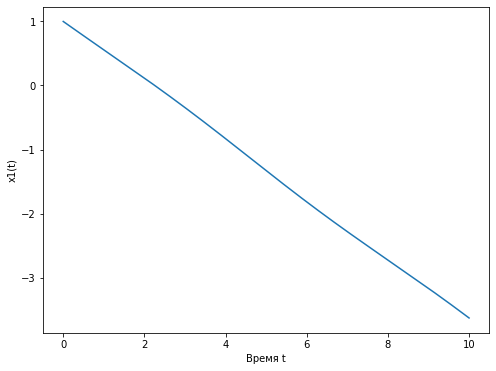

In [33]:
# Graphique pour x1(t)
plt.figure(figsize=(8,6))
plt.plot(t,x1)
plt.xlabel("Время t")
plt.ylabel("x1(t)")
plt.show()

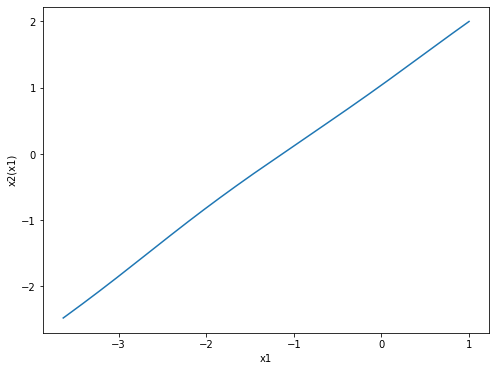

In [35]:
# Graphique pour x2(x1)
plt.figure(figsize=(8,6))
plt.plot(x1,x2)
plt.xlabel("x1")
plt.ylabel("x2(x1)")
plt.show()

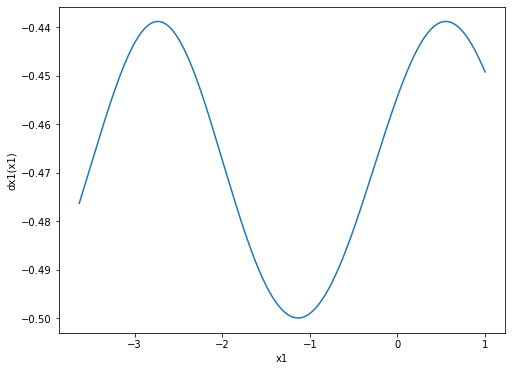

In [36]:
# Graphique pour dx1(x1)
plt.figure(figsize=(8,6))
plt.plot(x1,dx1)
plt.xlabel("x1")
plt.ylabel("dx1(x1)")
plt.show()